In [1]:
import pandas as pd
import numpy as np
import seaborn as seb
import matplotlib.pyplot as plt
import statsmodels.api as stm

In [3]:
df = pd.read_csv("insurance.csv").round(2)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663572,1.094918,13270.422280
std,14.049960,6.097951,1.205493,12110.011259
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.297500,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.692500,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<Figure size 720x576 with 0 Axes>

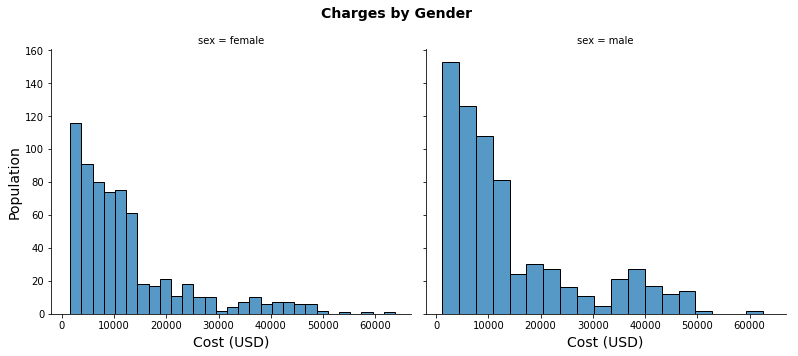

In [30]:
plt.figure(figsize= [10, 8])
grid = seb.FacetGrid(df, col="sex", height=5, aspect=1.1)
grid.map(seb.histplot, "charges")
grid.add_legend()
grid.fig.suptitle("Charges by Gender", fontsize=14, fontweight="bold")
grid.set_xlabels("Cost (USD)", fontsize=14)
grid.set_ylabels("Population", fontsize=14)
plt.tight_layout()

<Figure size 720x576 with 0 Axes>

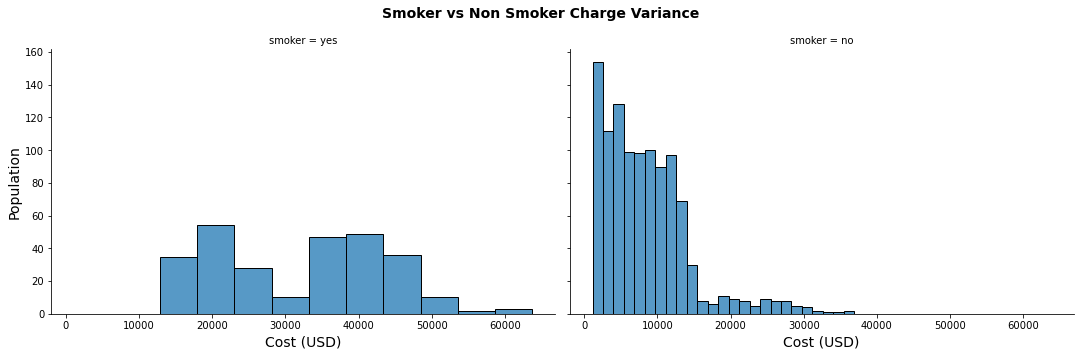

In [33]:
plt.figure(figsize= [10, 8])
grid = seb.FacetGrid(df, col="smoker", height=5, aspect=1.5)
grid.map(seb.histplot, "charges")
grid.add_legend()
grid.fig.suptitle("Smoker vs Non Smoker Charge Variance", fontsize=14, fontweight="bold")
grid.set_xlabels("Cost (USD)", fontsize=14)
grid.set_ylabels("Population", fontsize=14)
plt.tight_layout()

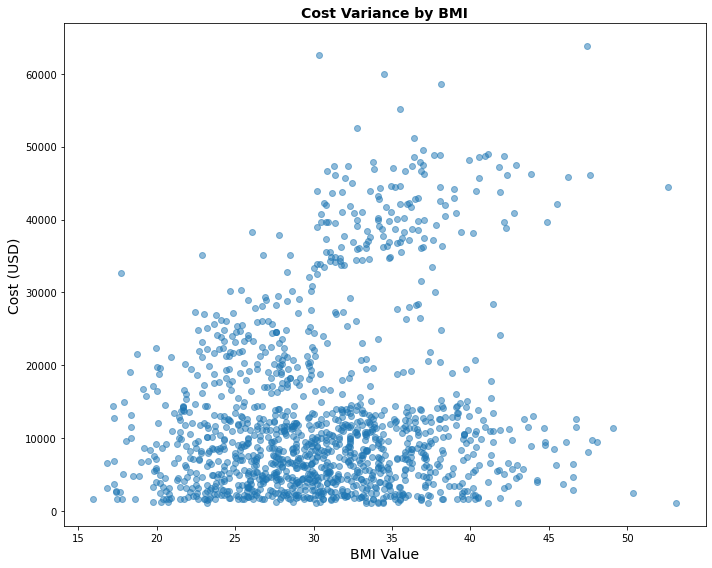

In [40]:
plt.figure(figsize=[10, 8])
plt.scatter(df.bmi, df.charges, alpha=0.5)
plt.title("Cost Variance by BMI", fontweight="bold", fontsize= 14)
plt.xlabel("BMI Value", fontsize= 14)
plt.ylabel("Cost (USD)", fontsize= 14)
plt.tight_layout()

In [41]:
lesT_10000 = df[df["charges"] <= 10000]
age_x = lesT_10000["age"].values
bmi_x = lesT_10000["bmi"].values
charge_y = lesT_10000["charges"].values

In [42]:
age_x_vector = age_x.reshape(-1,1)
bmi_x_vector = bmi_x.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(age_x_vector, charge_y, train_size=.8, test_size=.2)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (569, 1)
y_train shape (569,)
x_test shape (143, 1)
y_test shape (143,)


In [ ]:
plt.scatter(x_train, y_train, color="black")
plt.xlabel('Age')
plt.ylabel('Charge in $')
plt.title('Training Data')
plt.show()